In [1]:
from brainiak.funcalign.srm import SRM
from sklearn.preprocessing import StandardScaler
from copy import deepcopy
import numpy as np 

import matplotlib.pyplot as plt 
import hypertools as hyp 

import logging

np.random.seed(0)
%autosave 5 

Autosaving every 5 seconds


In [85]:
def get_ortho_matrix(V): 
    Q, _ = np.linalg.qr(np.random.normal(size=(V,V)))
    return Q

def transpose_matrix_list(matrix_list): 
    return [m.T for m in matrix_list]

def normalize_matrix_list(matrix_list):
    ss = StandardScaler()
    for i in range(len(matrix_list)):
        matrix_list[i] = ss.fit_transform(matrix_list[i].T).T
#         matrix_list[i] = ss.fit_transform(matrix_list[i])
    return matrix_list 

def gen_simulated_data(n_subjects, V, T, noise_level):
    # make subject 1 
    X = np.random.normal(size=(V,T))
    
    # multi-subject data 
    data = [X]
    # create additional subjects based on subject 1 
    for _ in range(n_subjects-1): 
        X_new = deepcopy(X)     
        
        # rotation 
        Q = get_ortho_matrix(V)
        X_new = Q @ X_new 
        
        # scaling 
        scaling_op = np.eye(V) * 2
        X_new = scaling_op @ X_new
    
        # shift by a vector
        shift_op = np.zeros(shape=(V,T))
        shift_op[0,:] = 1
        X_new = X_new + shift_op
        
        # add noise
        noise = np.random.normal(size=(V,T)) * noise_level
        X_new = X_new + noise
        
        # append 
        data.append(X_new)
        
    return data 

In [94]:
"""gen data"""
# constants 
V = 3
T = 5
n_subjects = 2
noise_level = 0.1

data = gen_simulated_data(n_subjects, V, T, noise_level)

print(np.shape(data))

(2, 3, 5)


In [96]:
data = normalize_matrix_list(data)
for i in range(2):    
    print(np.shape(np.mean(data[0], axis=i)))
    print(np.mean(data[0], axis=i))
    print(np.std(data[0], axis=i))

(5,)
[-0.71593937 -0.26152346  0.13008052  0.03123515  0.81614715]
[0.44866758 1.40347845 1.09331546 0.23536951 0.55968891]
(3,)
[0.00000000e+00 0.00000000e+00 1.73472348e-17]
[1. 1. 1.]


In [97]:
%matplotlib notebook  

Traceback (most recent call last):
  File "/home/qlu/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/home/qlu/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'
Traceback (most recent call last):
  File "/home/qlu/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/home/qlu/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


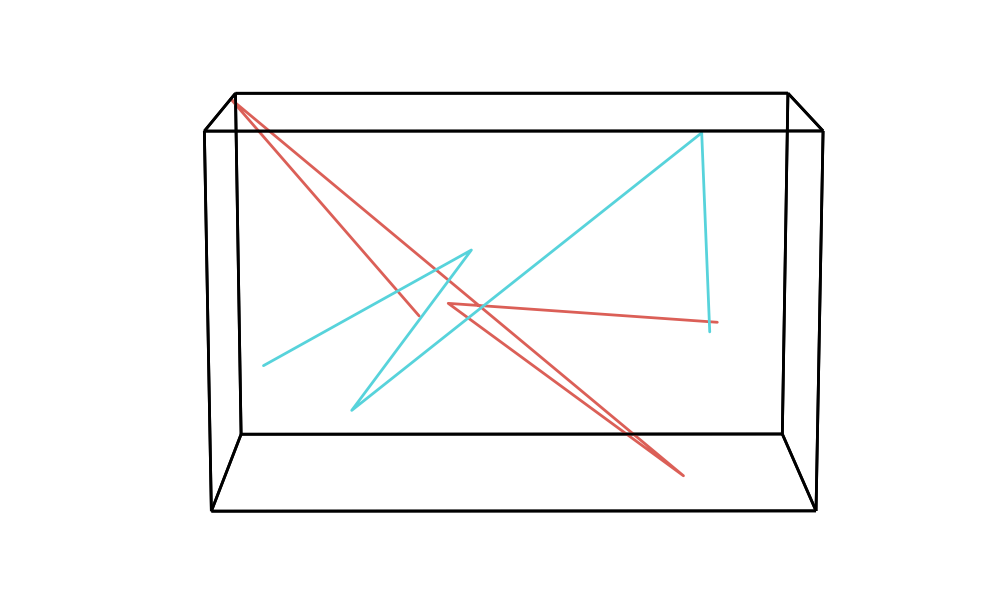

In [98]:
hyp.plot(
    transpose_matrix_list(data), 
    animate='spin', frame_rate=60, rotations=1,
    size=(5, 3)
)

In [99]:
"""align"""

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

n_components = 3

srm = SRM(features=n_components)
srm.fit(data)
data_srm = srm.transform(data)

print(np.shape(data_srm))

INFO:brainiak.funcalign.srm:Starting Probabilistic SRM
INFO:brainiak.funcalign.srm:Iteration 1
INFO:brainiak.funcalign.srm:Objective function -19.892620
INFO:brainiak.funcalign.srm:Iteration 2
INFO:brainiak.funcalign.srm:Objective function -9.829324
INFO:brainiak.funcalign.srm:Iteration 3
INFO:brainiak.funcalign.srm:Objective function -2.198583
INFO:brainiak.funcalign.srm:Iteration 4
INFO:brainiak.funcalign.srm:Objective function 4.660313
INFO:brainiak.funcalign.srm:Iteration 5
INFO:brainiak.funcalign.srm:Objective function 10.184725
INFO:brainiak.funcalign.srm:Iteration 6
INFO:brainiak.funcalign.srm:Objective function 14.180122
INFO:brainiak.funcalign.srm:Iteration 7
INFO:brainiak.funcalign.srm:Objective function 16.680952
INFO:brainiak.funcalign.srm:Iteration 8
INFO:brainiak.funcalign.srm:Objective function 18.087499
INFO:brainiak.funcalign.srm:Iteration 9
INFO:brainiak.funcalign.srm:Objective function 18.762241
INFO:brainiak.funcalign.srm:Iteration 10
INFO:brainiak.funcalign.srm:Obj

(2, 3, 5)


<IPython.core.display.Javascript object>


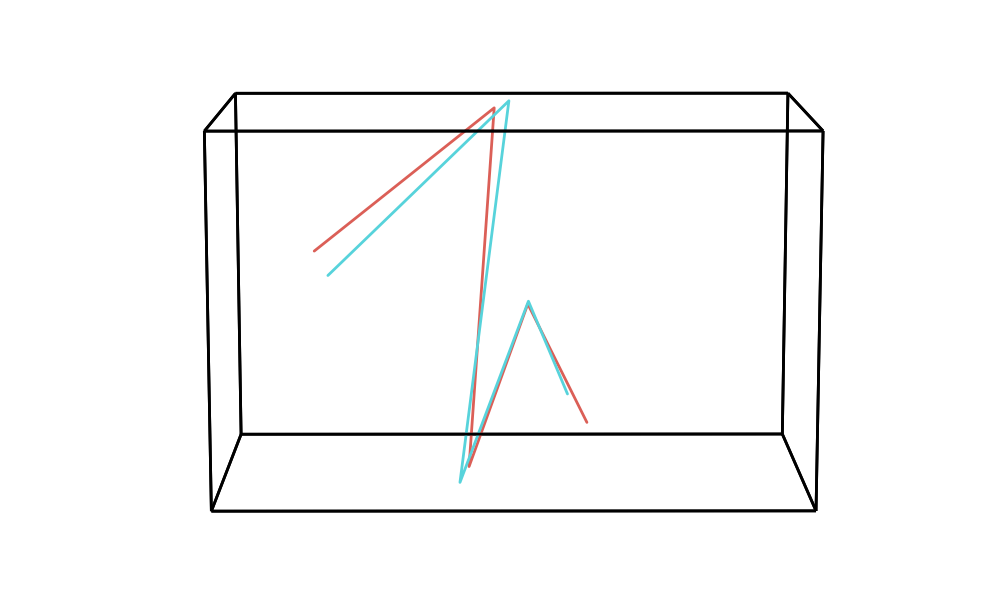

In [100]:
hyp.plot(
    transpose_matrix_list(data_srm), 
    animate='spin', frame_rate=60, rotations=1,
    size=(5, 3)
)

<IPython.core.display.Javascript object>


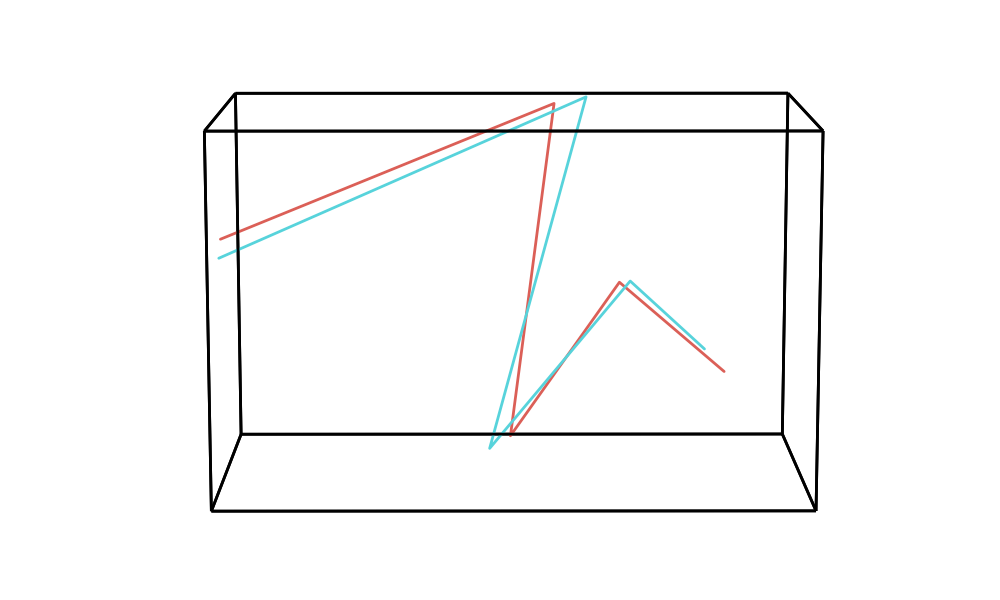

In [102]:
data_srm = normalize_matrix_list(data_srm)
hyp.plot(
    transpose_matrix_list(data_srm), 
    animate='spin', frame_rate=60, rotations=1,
    size=(5, 3)
)